# IMPORT LIBRARIES

In [243]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style="darkgrid")

# IMPORT DATA

In [244]:
df = pd.read_csv("D:/DATA ANALYST/PROJECTS/CUSTOMER SEGMENTATION/in/Mall_Customers.csv")

In [245]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# UNIVARIATE ANALYSIS

In [246]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

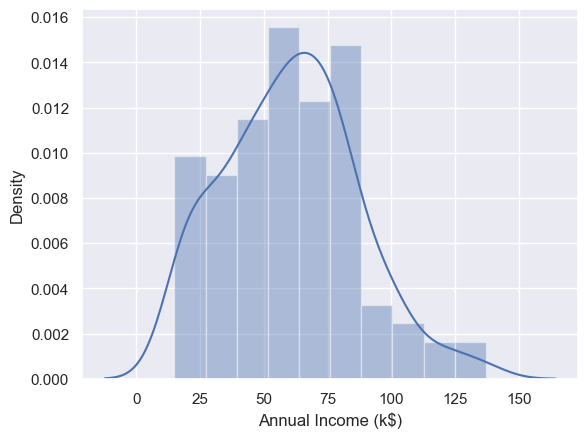

In [247]:
sns.distplot(df['Annual Income (k$)'])

## create a for loop to generate same visual for all numeric variables

In [299]:
df.columns ##quickly to copy the column names


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income Cluster',
       'Spending and Income Cluster'],
      dtype='object')

In [300]:
columns = ['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']

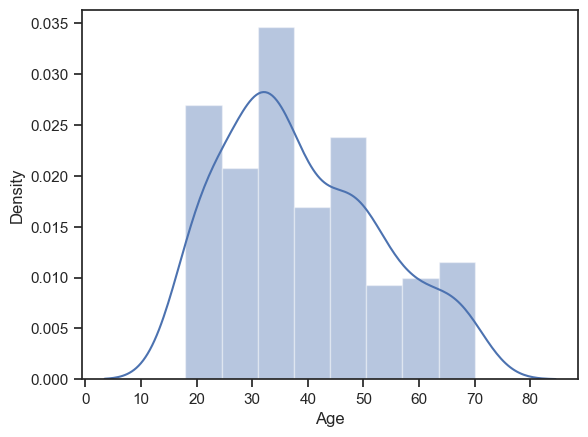

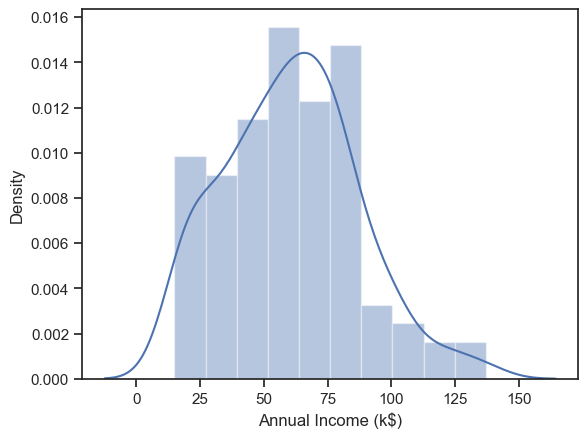

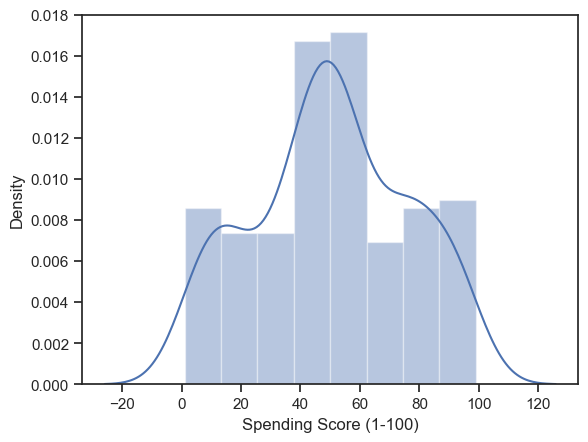

In [301]:
for i in columns:
    plt.figure()
    sns.distplot(df[i])
    

## scatterplot matrix by Gender

## Plot the frequency of each variable and differenciate them by gender 

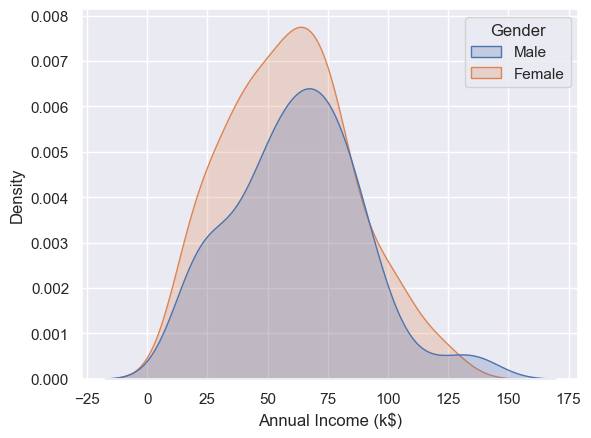

In [251]:

sns.kdeplot(data=df, x="Annual Income (k$)", shade = True, hue = "Gender")
plt.show()

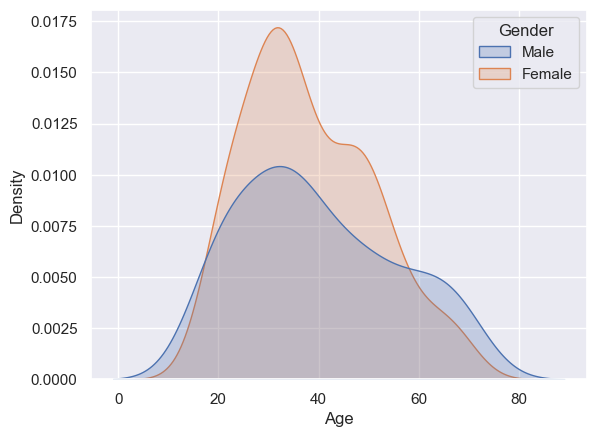

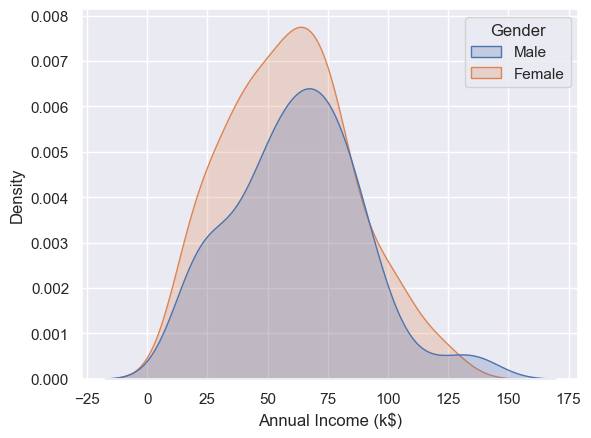

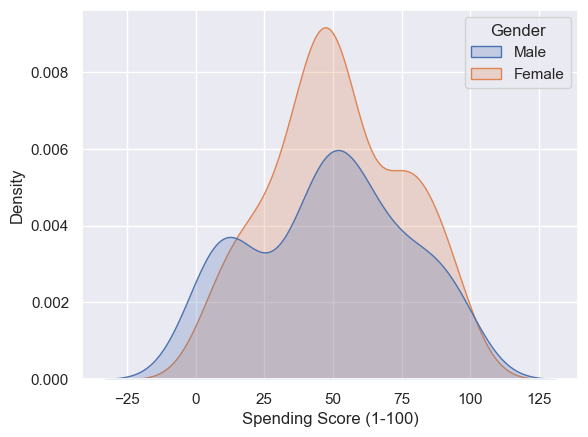

In [252]:
columns = ['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.kdeplot(data=df, x=i, shade = True, hue = "Gender")
    plt.show()
    




# 

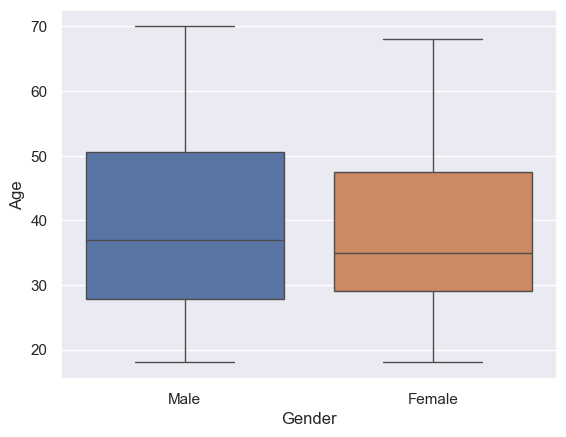

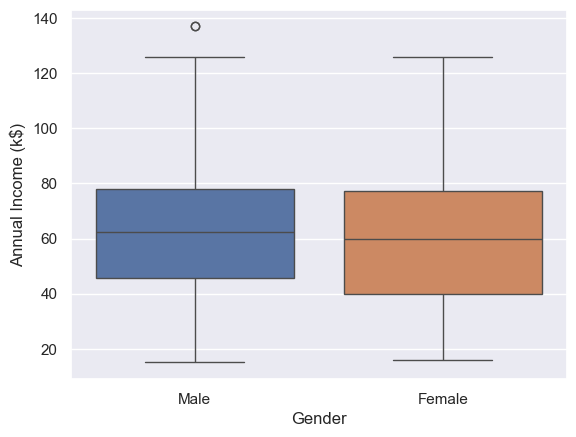

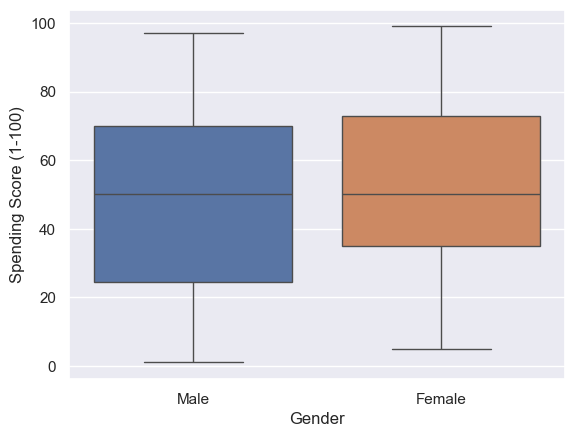

In [253]:
columns = ['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df, x="Gender", y= df[i], hue = "Gender")
    plt.show()

In [254]:
 df['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

# BIVARIATE ANALYSIS

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

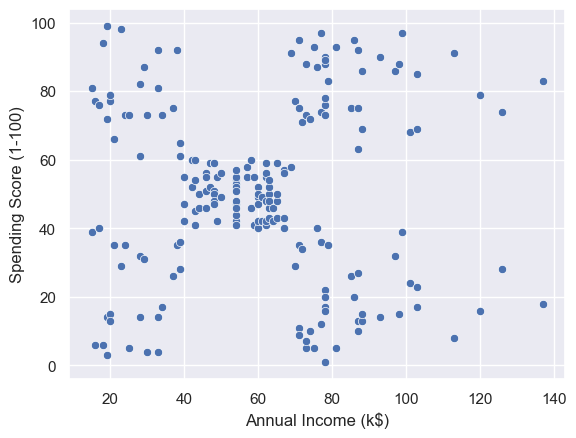

In [255]:
sns.scatterplot(data=df, x="Annual Income (k$)", y = "Spending Score (1-100)")

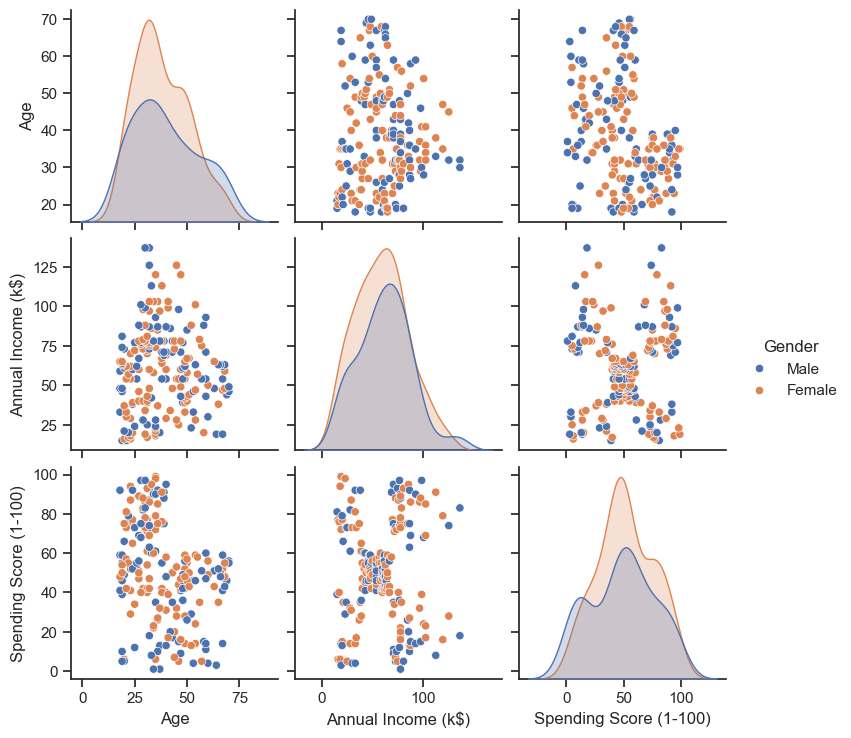

In [256]:
columns = ['Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Gender']
subset_df=df[columns]
sns.set_theme(style="ticks")
sns.pairplot(subset_df, hue='Gender')
plt.show()

In [257]:
df.groupby("Gender")[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [258]:
correlation_matrix = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()
print(correlation_matrix)

                             Age  Annual Income (k$)  Spending Score (1-100)
Age                     1.000000           -0.012398               -0.327227
Annual Income (k$)     -0.012398            1.000000                0.009903
Spending Score (1-100) -0.327227            0.009903                1.000000


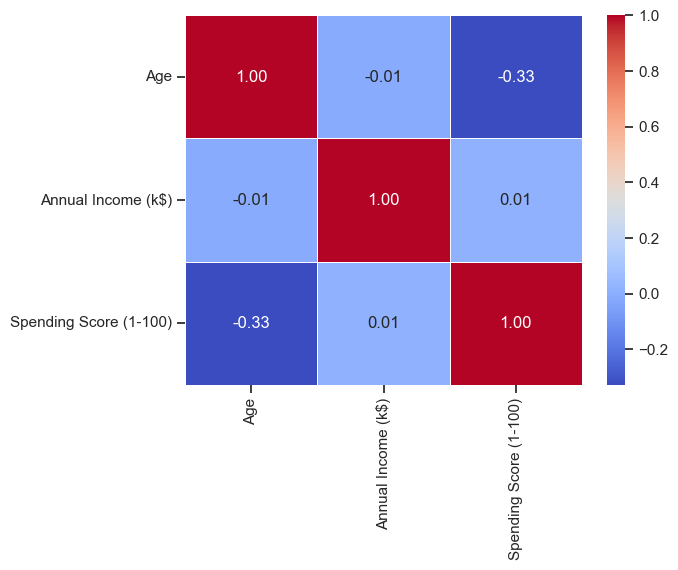

In [259]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.show()

# CUSTOMER SEGMENTATION: CLUSTERING

## UNIVARIATE CLUSTERING

In [260]:
df = pd.read_csv("D:/DATA ANALYST/PROJECTS/CUSTOMER SEGMENTATION/in/Mall_Customers.csv")
clustering1 = KMeans(random_state=42)
## random state is applied so that every time we run the code, we get same results
## by default, kmeans applies 8 as number of clusters. later I'm gonna change it to a number that is optimal,
## meaning that the distance between points within clusters is minimized while the distance between clusters increases. 


In [261]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(random_state=42)

In [262]:
clustering1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 4, 4, 4,
       4, 4])

In [263]:
df['Income Cluster'] = clustering1.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [264]:
df['Income Cluster'].value_counts()

Income Cluster
5    42
1    36
0    32
7    28
3    26
2    16
6    14
4     6
Name: count, dtype: int64

In [265]:
## identify how many clusters is eadial to have

In [266]:
#using Elbow method to identify the best number of clusters

In [267]:
inertia_value = clustering1.inertia_
print("Inertia:", inertia_value)

Inertia: 2822.4996947496948


In [268]:
inertia_score = []  
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_score.append(kmeans.inertia_)

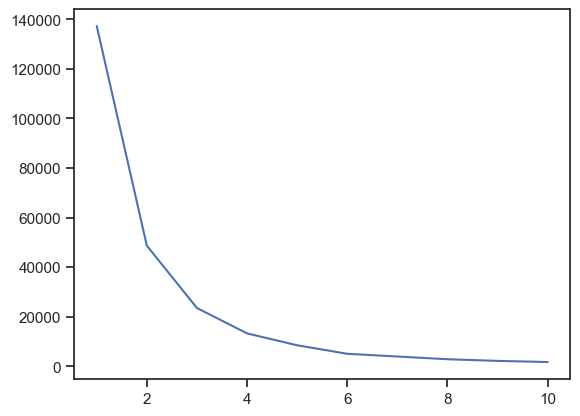

In [269]:
plt.plot(range(1,11), inertia_score)

In [270]:
## the optimal number of clusters is 3

In [271]:
clustering1 = KMeans(random_state=42, n_clusters = 3)
clustering1.fit(df[['Annual Income (k$)']])
clustering1.labels_
df['Income Cluster'] = clustering1.labels_
df.head()
df['Income Cluster'].value_counts()

Income Cluster
1    90
0    74
2    36
Name: count, dtype: int64

In [272]:
## analysis within clusters

In [273]:
## univariate analysis of clusters: mean

In [274]:
df.groupby('Income Cluster')[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,39.500000,33.486486,50.229730
1,38.722222,67.088889,50.000000
2,37.833333,99.888889,50.638889


## BIVARIATE CLUSTERING

In [275]:
clustering2 = KMeans(random_state=42)
clustering2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
clustering2.labels_
df['Spending and Income Cluster'] = clustering2.labels_
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,0,2
1,2,Male,21,15,81,0,4
2,3,Female,20,16,6,0,2
3,4,Female,23,16,77,0,4
4,5,Female,31,17,40,0,2


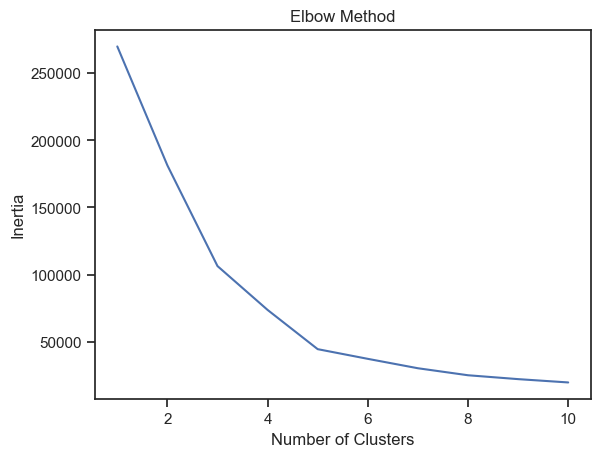

In [276]:
inertia_score2 = []  
for i in range(1, 11):
    kmeans2 = KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_score2.append(kmeans2.inertia_)
plt.plot(range(1, 11), inertia_score2)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()
   


In [277]:
## the optimal number of clusters is 5

In [278]:
clustering2 = KMeans(random_state=42, n_clusters = 5)
clustering2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
clustering2.labels_
df['Spending and Income Cluster'] = clustering2.labels_
df.head()
df['Spending and Income Cluster'].value_counts()


Spending and Income Cluster
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64

In [279]:
df.groupby('Spending and Income Cluster')[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,42.716049,55.296296,49.518519
1,32.692308,86.538462,82.128205
2,25.272727,25.727273,79.363636
3,41.114286,88.200000,17.114286
4,45.217391,26.304348,20.913043


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

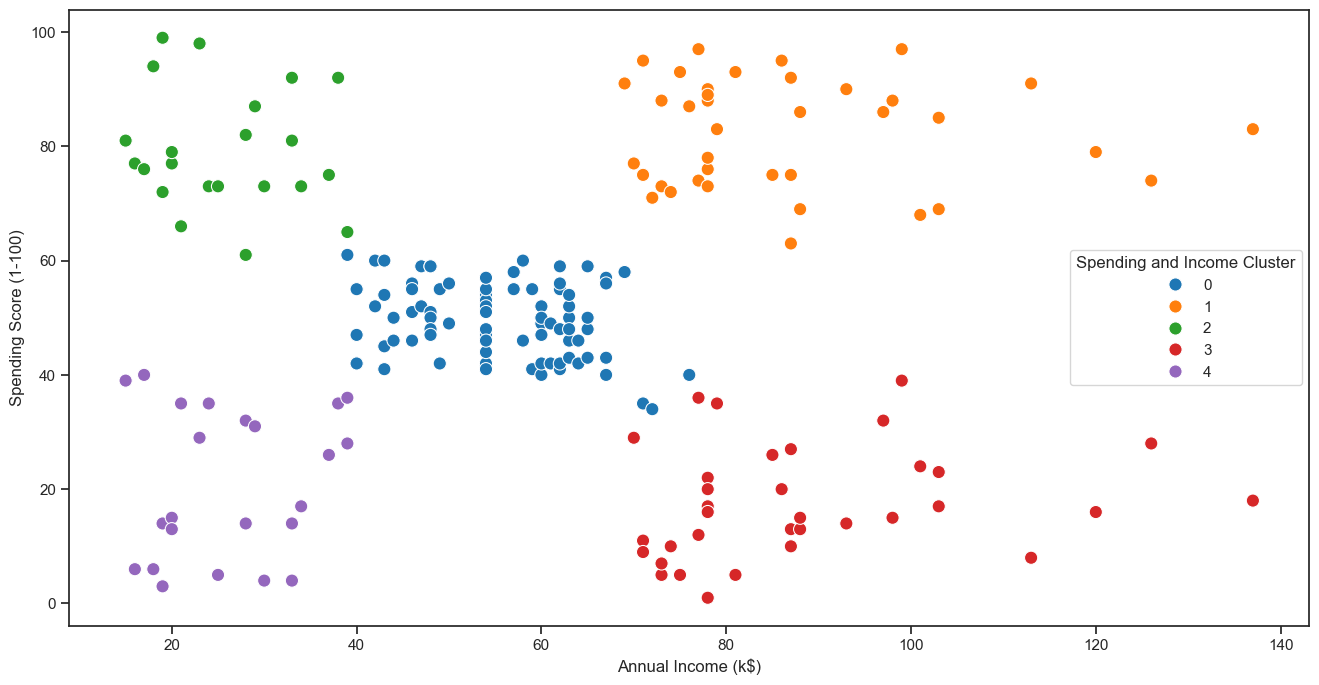

In [280]:
plt.figure(figsize=(16, 8))
sns.scatterplot(data = df, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = 'Spending and Income Cluster', palette = "tab10", s=90)


In [281]:
## calculating cluster centers
centers2 = pd.DataFrame(clustering2.cluster_centers_)
centers2.columns = ['x', 'y']
centers2

,x,y
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

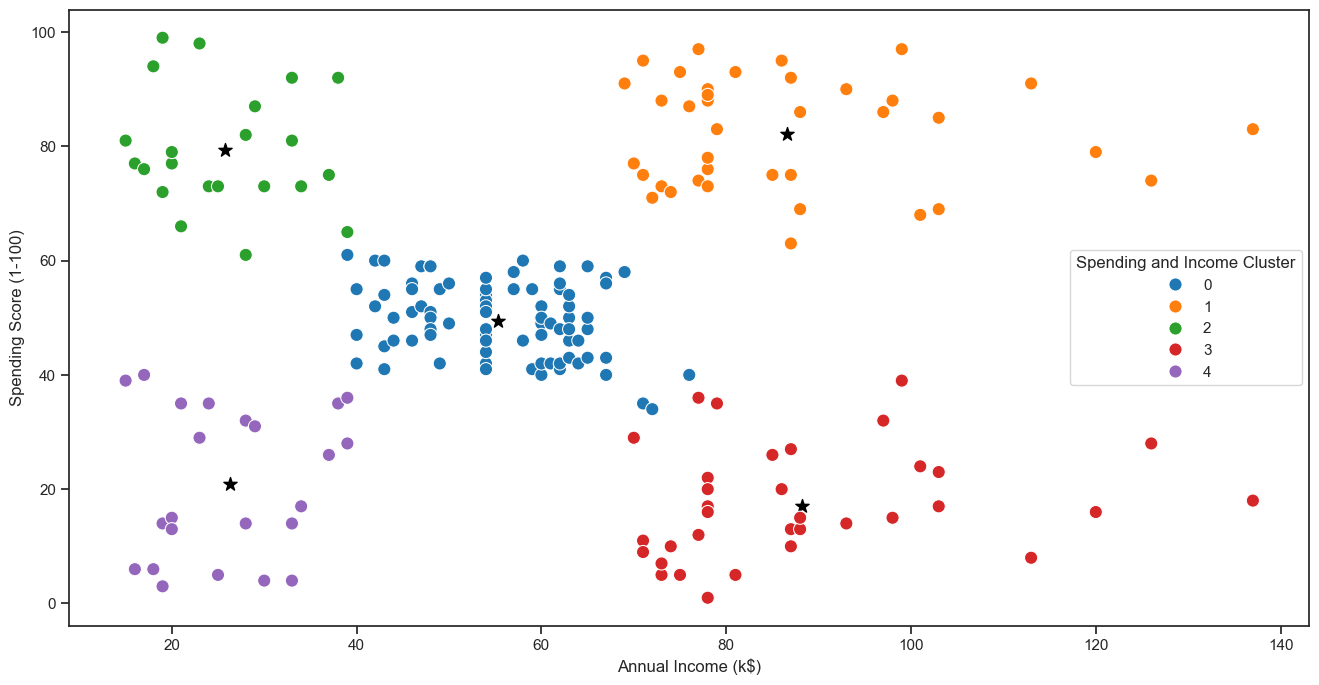

In [282]:
## redo plot with centers
plt.figure(figsize=(16, 8))
plt.scatter(x = centers2['x'], y = centers2['y'], s=100, c = 'black', marker = '*')
sns.scatterplot(data = df, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = 'Spending and Income Cluster', palette = "tab10", s=90)


In [283]:
pd.crosstab(df['Spending and Income Cluster'], df['Gender'], normalize = 'index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.592593,0.407407
1,0.538462,0.461538
2,0.590909,0.409091
3,0.457143,0.542857
4,0.608696,0.391304


In [284]:
## the "ideal" cluster, which means high income, high spending score cluster is cluster #1 (orange dots) which has 53% female and 47% male 

In [285]:
df.groupby('Spending and Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,42.716049,55.296296,49.518519
1,32.692308,86.538462,82.128205
2,25.272727,25.727273,79.363636
3,41.114286,88.200000,17.114286
4,45.217391,26.304348,20.913043


In [286]:
## in our target cluster, the mean age is 33 years, annual mean income is 86k per year, and their spending score is 82, whatever that means.

## MULTIVARIATE CLUSTERING

In [287]:
from sklearn.preprocessing import StandardScaler

In [288]:
scale = StandardScaler()

In [289]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,0,4
1,2,Male,21,15,81,0,2
2,3,Female,20,16,6,0,4
3,4,Female,23,16,77,0,2
4,5,Female,31,17,40,0,4


In [290]:
dff = df.copy()
dff['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

# can drop the original 'Gender' column
# df = df.drop('Gender', axis=1)

dff.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,1,19,15,39,0,4
1,2,1,21,15,81,0,2
2,3,0,20,16,6,0,4
3,4,0,23,16,77,0,2
4,5,0,31,17,40,0,4


In [291]:
dff = pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3,4,5,6
0,-1.723412,1.128152,-1.424569,-1.738999,-0.434801,-1.129915,1.798458
1,-1.706091,1.128152,-1.281035,-1.738999,1.195704,-1.129915,0.415029
2,-1.688771,-0.886405,-1.352802,-1.700830,-1.715913,-1.129915,1.798458
3,-1.671450,-0.886405,-1.137502,-1.700830,1.040418,-1.129915,0.415029
4,-1.654129,-0.886405,-0.563369,-1.662660,-0.395980,-1.129915,1.798458


In [292]:
## do the same as for previous clustering

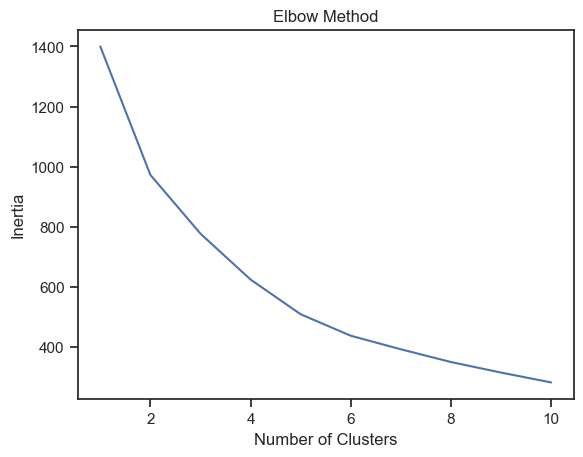

In [293]:
inertia_score3 = []  
for i in range(1, 11):
    kmeans3 = KMeans(n_clusters=i)
    kmeans3.fit(dff)
    inertia_score3.append(kmeans3.inertia_)
plt.plot(range(1, 11), inertia_score3)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [294]:
# optimal cluster analysis is 4

In [303]:
clustering3 = KMeans(random_state=42, n_clusters = 4)
clustering3.fit(df[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']])
clustering3.labels_
df['Spending, Income and Age Cluster'] = clustering3.labels_
df.head()
df['Spending, Income and Age Cluster'].value_counts()

Spending, Income and Age Cluster
0    95
1    39
3    38
2    28
Name: count, dtype: int64

In [304]:
df.groupby('Spending, Income and Age Cluster')[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
"Spending, Income and Age Cluster",,,
0,44.894737,48.705263,42.631579
1,32.692308,86.538462,82.128205
2,24.821429,28.714286,74.250000
3,40.394737,87.000000,18.631579


<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

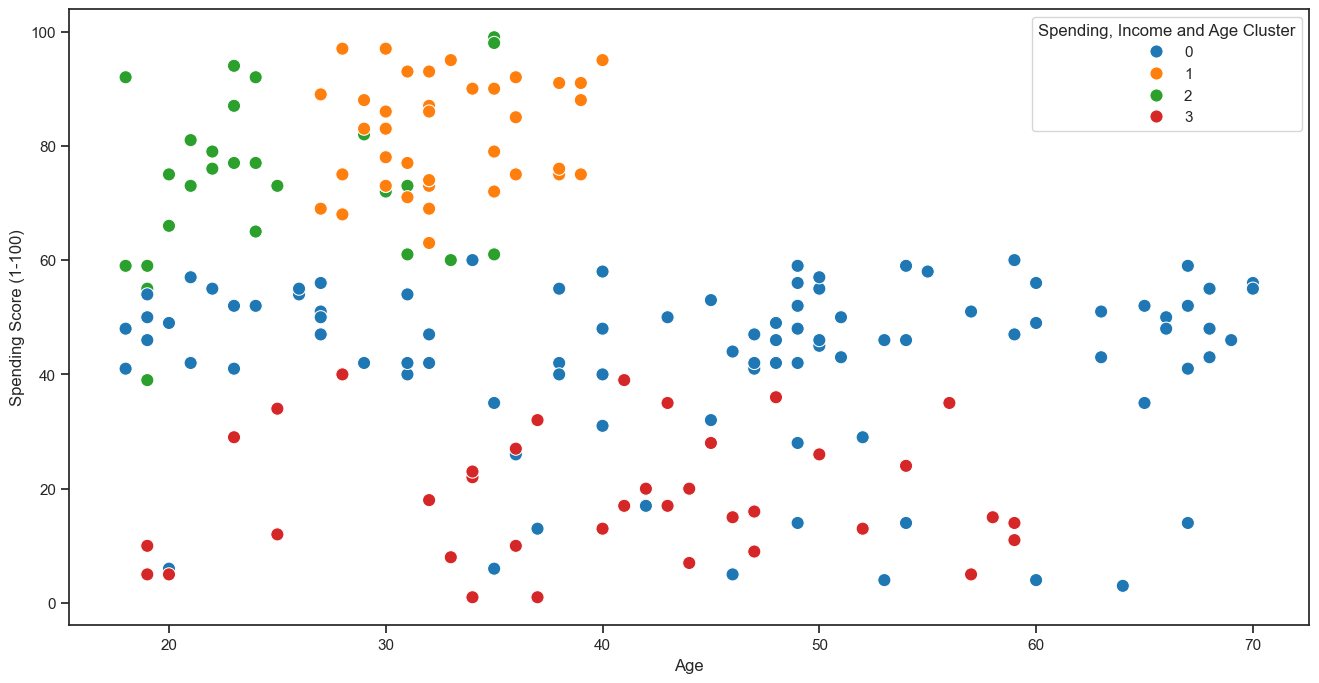

In [306]:
plt.figure(figsize=(16, 8))
sns.scatterplot(data = df, x = 'Age', y = 'Spending Score (1-100)', hue = 'Spending, Income and Age Cluster', palette = "tab10", s=90)


<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

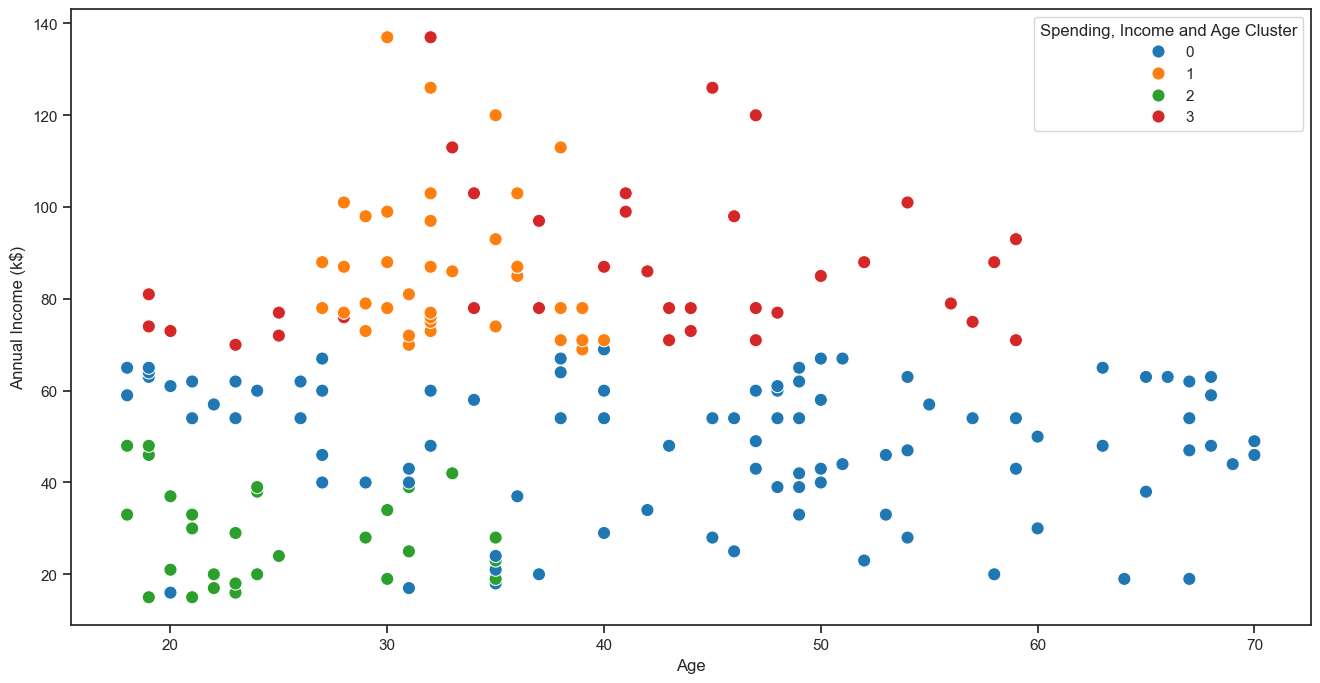

In [307]:
plt.figure(figsize=(16, 8))
sns.scatterplot(data = df, x = 'Age', y = 'Annual Income (k$)', hue = 'Spending, Income and Age Cluster', palette = "tab10", s=90)


In [296]:
df.to_csv('Clustering.csv')